# Libraries

In [4]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

# Load Data

In [108]:
df = pd.read_csv("../data/all_Seasons_MVP.csv")

In [109]:
df.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Season,MVP
0,1,Kareem Abdul-Jabbar*,C,37,LAL,79,79,2630,723,1207,...,622,249,63,162,197,238,1735,1985,1984-85,NaN
1,2,Alvan Adams,PF,30,PHO,82,69,2136,476,915,...,500,308,115,48,197,254,1202,1985,1984-85,NaN
2,3,Mark Aguirre,SF,25,DAL,80,79,2699,794,1569,...,477,249,60,24,253,250,2055,1985,1984-85,NaN


In [110]:
# Tomar cuidado com quem mudou de time

In [111]:
# Target
df.loc[df['MVP'].isnull(),'Target'] = 0
df.loc[~df['MVP'].isnull(),'Target'] = 1

In [112]:
SeasonComplete = df.loc[df['Target']==1]['Season']
df = df.loc[df['Season'].isin(SeasonComplete)]

# Features

In [113]:
target = 'Target'
feat1 = ['Age', 'FG%', '3P%', '2P%', 'eFG%', 'FT%']
feat2 = ['GS_PG','MP_PG','FG_PG','FGA_PG','3P_PG','3PA_PG','2P_PG','2PA_PG','FT_PG','FTA_PG','ORB_PG','DRB_PG','TRB_PG','PTS_PG','PF_PG','TOV_PG','BLK_PG','STL_PG','AST_PG']
features = feat1+feat2

In [114]:
originVar = ['GS','MP','FG','FGA','3P','3PA','2P','2PA','FT','FTA','ORB','DRB','TRB','PTS','PF','TOV','BLK','STL','AST']
for var in range(len(originVar)):
    df.loc[:,feat2[var]] = df.loc[:,originVar[var]]/df.loc[:,'G']

In [115]:
# Tratar as Positions/Team como variável
# 'Pos'
# 'Tm'

# Basic Filters

In [130]:
df = df.loc[df['PTS_PG']>22]

# Data Imputation

In [131]:
df = df.fillna(df.mean())

# Sample/Prepare

In [132]:
# Prepare the data data
X = df[features]
y = df[target]

# Fit Classifier

In [133]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=2021,max_depth=3,min_samples_leaf=2)
model = clf.fit(X, y)

In [134]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_8 <= 10.00
|   |--- feature_24 <= 7.22
|   |   |--- feature_23 <= 0.67
|   |   |   |--- class: 0.0
|   |   |--- feature_23 >  0.67
|   |   |   |--- class: 0.0
|   |--- feature_24 >  7.22
|   |   |--- feature_20 <= 1.72
|   |   |   |--- class: 1.0
|   |   |--- feature_20 >  1.72
|   |   |   |--- class: 0.0
|--- feature_8 >  10.00
|   |--- feature_13 <= 17.05
|   |   |--- feature_13 <= 14.45
|   |   |   |--- class: 0.0
|   |   |--- feature_13 >  14.45
|   |   |   |--- class: 1.0
|   |--- feature_13 >  17.05
|   |   |--- class: 0.0



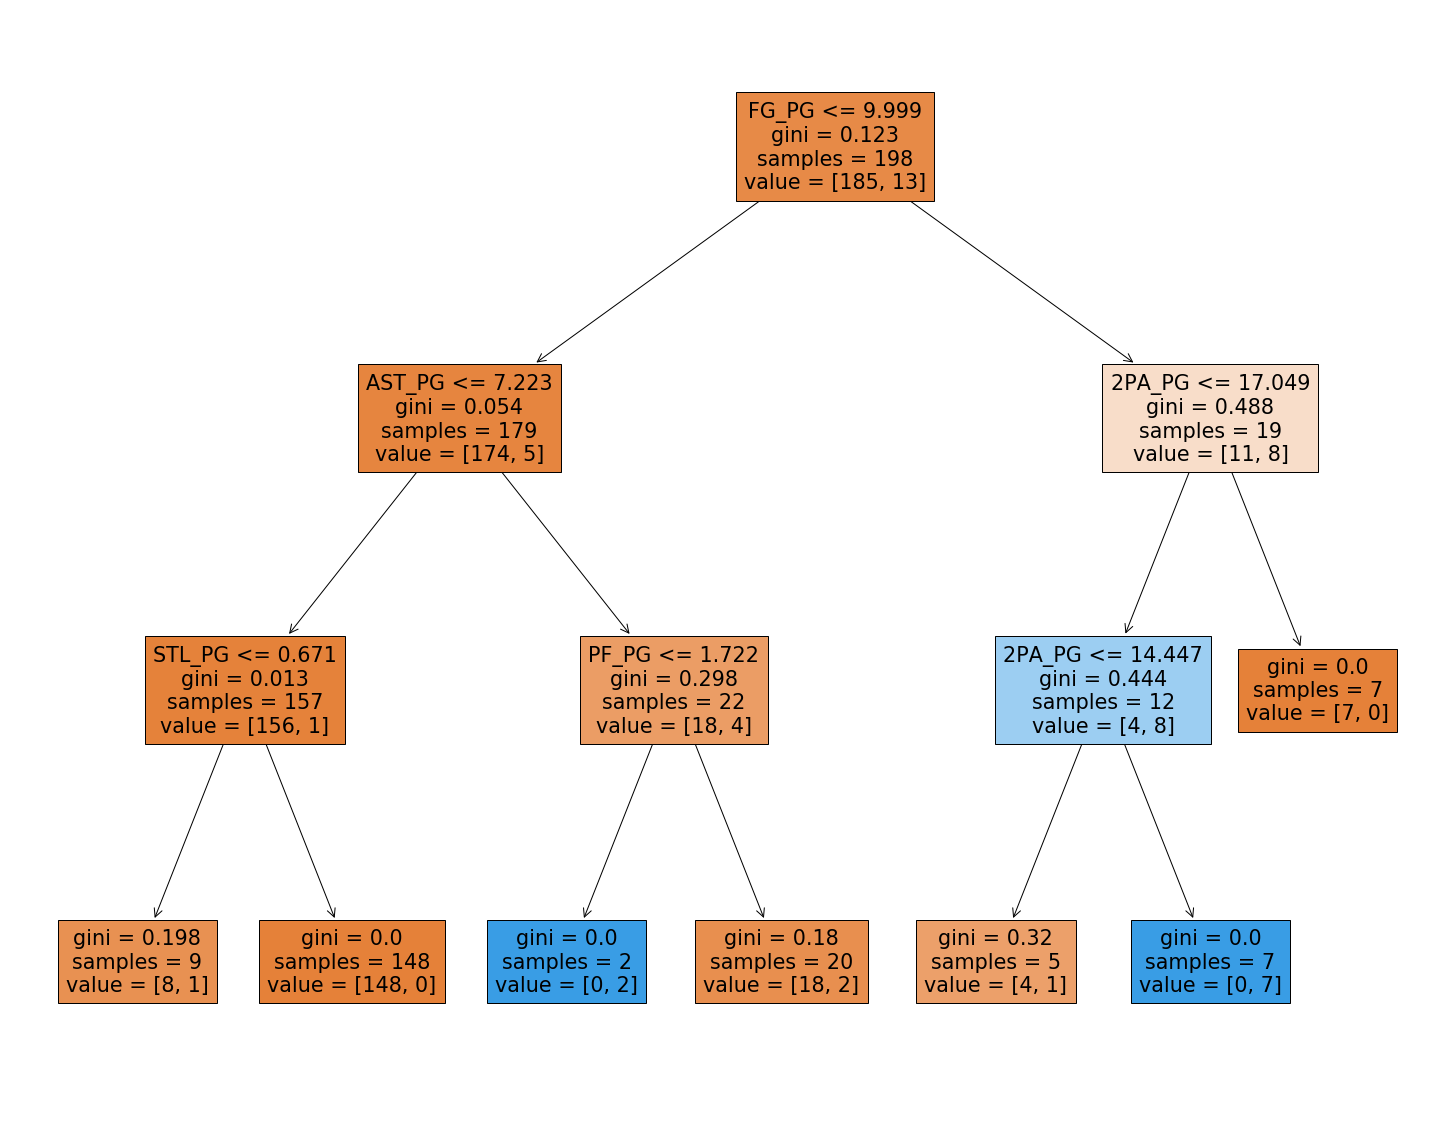

In [135]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=features,  
                   filled=True)

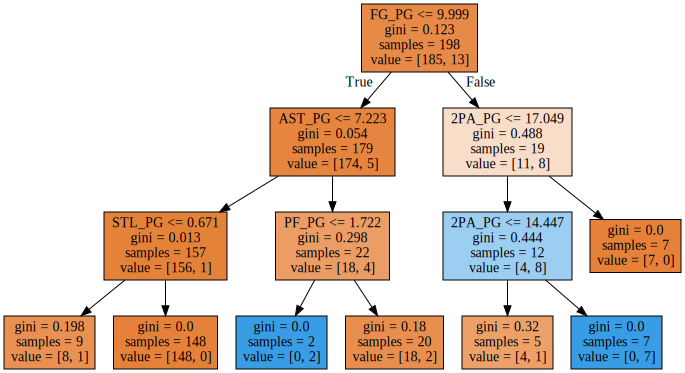

In [137]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=features,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# Predict

In [138]:
y_model = model.predict(X)
y_model_proba = model.predict_proba(X)

In [139]:
#Acurácia
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

0.9797979797979798

In [140]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y# ground truth labels
y_probas = y_model_proba# predicted probabilities generated by sklearn classifier

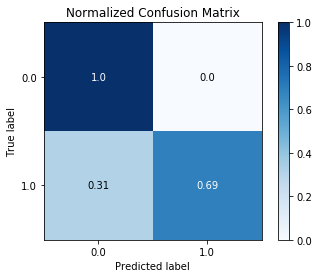

In [141]:
skplt.metrics.plot_confusion_matrix(y, y_model, normalize=True)

C:\Users\thiag\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


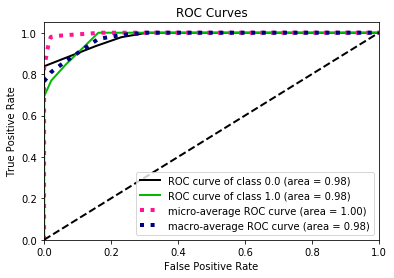

In [142]:
skplt.metrics.plot_roc_curve(y,y_model_proba)
plt.show()

C:\Users\thiag\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


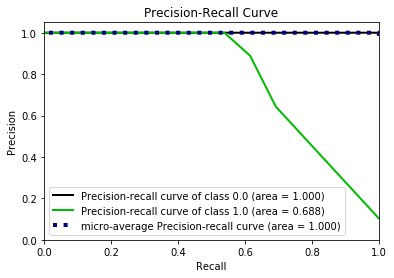

In [129]:
skplt.metrics.plot_precision_recall_curve(y, y_model_proba)
plt.show()